# Homework-1: Softmax for MNIST Classification

### In this homework, you need to
- ### implement and apply a softmax classifier to perform digits classification.

In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load MNIST Dataset
The **mnist_data_loader.py** is a script to load mnist dataset, which is included in [TensorFlow tutorial](https://github.com/tensorflow/tensorflow/blob/r0.7/tensorflow/examples/tutorials/mnist/input_data.py).

In [2]:
import mnist_data_loader

mnist_dataset = mnist_data_loader.read_data_sets("./MNIST_data/", one_hot=True)

# training dataset
train_set = mnist_dataset.train 
# test dataset
test_set = mnist_dataset.test   

train_size = train_set.num_examples
test_size = test_set.num_examples
print()
print('Training dataset size: ', train_size)
print('Test dataset size: ', test_size)

C:\Users\chou\AppData\Roaming\Python\Python35\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\chou\AppData\Roaming\Python\Python35\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\chou\AppData\Roaming\Python\Python35\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\chou\AppData\Roaming\Python\Python35\site-pack

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz

Training dataset size:  60000
Test dataset size:  10000


## Data Example
To have a better understand of MNIST dataset, we can visualize some examples in MNIST.

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


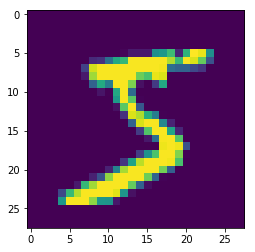

In [3]:
# You can choose any image in training set to visualize, example_id ∈ [0,60000)
example_id = 0 

image = train_set.images[example_id] # shape = 784 (28*28)
label = train_set.labels[example_id] # shape = 10
#print(image)
print(label)
plt.imshow(np.reshape(image,[28,28]))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [4]:
batch_size = 100
max_epoch = 20
learning_rate = 0.15

# For regularization
lamda = 0.0001

### TODO
Before executing the following code, you should accomplish **./softmax_classifier.py**.

In [5]:
from softmax_classifier import softmax_classifier

## Train

In [6]:
# Weight Initialization
W = np.random.randn(28*28, 10) * 0.001

loss_set = []
accu_set = []
disp_freq = 100

# Training process
for epoch in range(0, max_epoch):
    iter_per_batch = train_size // batch_size
    for batch_id in range(0, iter_per_batch):
        batch = train_set.next_batch(batch_size) # get data of next batch
        input, label = batch
        
        # softmax_classifier
        loss, gradient, prediction = softmax_classifier(W, input , label, lamda)
        
        # Calculate accuracy
        label = np.argmax(label, axis=1) # scalar representation
        accuracy = sum(prediction == label) / float(len(label))
        
        loss_set.append(loss)
        accu_set.append(accuracy)
        
        # Update weights
        W = W - (learning_rate * gradient)
        if batch_id % disp_freq == 0:
            print("Epoch [{}][{}]\t Batch [{}][{}]\t Training Loss {:.4f}\t Accuracy {:.4f}".format(
                epoch, max_epoch, batch_id, iter_per_batch, 
                loss, accuracy))
    print()

Epoch [0][20]	 Batch [0][600]	 Training Loss 2.3044	 Accuracy 0.0700
Epoch [0][20]	 Batch [100][600]	 Training Loss 0.5016	 Accuracy 0.8500
Epoch [0][20]	 Batch [200][600]	 Training Loss 0.5879	 Accuracy 0.8100
Epoch [0][20]	 Batch [300][600]	 Training Loss 0.4886	 Accuracy 0.8100
Epoch [0][20]	 Batch [400][600]	 Training Loss 0.3428	 Accuracy 0.9200
Epoch [0][20]	 Batch [500][600]	 Training Loss 0.4097	 Accuracy 0.8900

Epoch [1][20]	 Batch [0][600]	 Training Loss 0.3297	 Accuracy 0.9100
Epoch [1][20]	 Batch [100][600]	 Training Loss 0.2509	 Accuracy 0.9200
Epoch [1][20]	 Batch [200][600]	 Training Loss 0.3068	 Accuracy 0.9600
Epoch [1][20]	 Batch [300][600]	 Training Loss 0.2332	 Accuracy 0.9600
Epoch [1][20]	 Batch [400][600]	 Training Loss 0.3893	 Accuracy 0.9000
Epoch [1][20]	 Batch [500][600]	 Training Loss 0.4357	 Accuracy 0.8900

Epoch [2][20]	 Batch [0][600]	 Training Loss 0.3487	 Accuracy 0.8600
Epoch [2][20]	 Batch [100][600]	 Training Loss 0.3942	 Accuracy 0.9000
Epoch [2][

Epoch [19][20]	 Batch [200][600]	 Training Loss 0.2296	 Accuracy 0.9400
Epoch [19][20]	 Batch [300][600]	 Training Loss 0.2389	 Accuracy 0.9100
Epoch [19][20]	 Batch [400][600]	 Training Loss 0.4615	 Accuracy 0.9000
Epoch [19][20]	 Batch [500][600]	 Training Loss 0.2160	 Accuracy 0.9400



## Test

In [7]:
correct = 0
iter_per_batch = test_size // batch_size

# Test process
for batch_id in range(0, iter_per_batch):
    batch = test_set.next_batch(batch_size)
    data, label = batch
    
    # We only need prediction results in testing
    _,_, prediction = softmax_classifier(W, data , label, lamda)
    label = np.argmax(label, axis=1)
    
    correct += sum(prediction == label)
    
accuracy = correct * 1.0 / test_size
print('Test Accuracy: ', accuracy)

Test Accuracy:  0.9213


## Plot

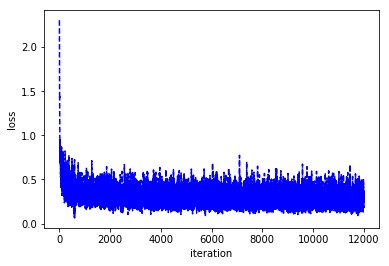

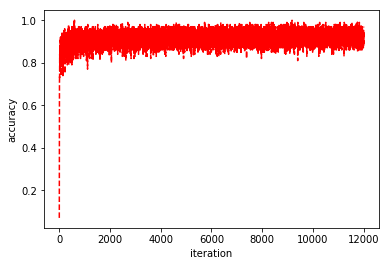

In [8]:
# training loss curve
plt.figure()
plt.plot(loss_set, 'b--')
plt.xlabel('iteration')
plt.ylabel('loss')
# training accuracy curve
plt.figure()
plt.plot(accu_set, 'r--')
plt.xlabel('iteration')
plt.ylabel('accuracy');

### You have finished homework1-softmax, congratulations!